In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pickle
import itertools
import gensim
from sklearn.model_selection import train_test_split
from numpy import zeros
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from gensim.models import Word2Vec

In [3]:
cd '/content/drive/My Drive/Dataset'

/content/drive/My Drive/Dataset


In [4]:
# Importing dataset
reviews_df = pd.read_csv('Hotel_Review.csv')
print(reviews_df.dtypes)

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object


In [5]:
def clean(text):
    '''
    '''
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace("'t", "")
    text = text.replace("'ve", "")
    text = text.replace(".", " . ")
    text = text.replace("!", " ! ")
    text = text.replace("?", " ? ")
    text = text.replace(";", " ; ")
    text = text.replace(":", " : ")
    text = text.replace(",", " , ")
    text = text.replace("´", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace("\'", "")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("–", "")
    text = text.replace("—", "")
    text = text.replace("[", "")
    text = text.replace("]","")
    text = text.replace("{","")
    text = text.replace("}", "")
    text = text.replace("/", "")
    text = text.replace("|", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("$", "")
    text = text.replace("+", "")
    text = text.replace("*", "")
    text = text.replace("%", "")
    text = text.replace("#", "")
    text = text.replace("\n", " \n ")
    text = text.replace("\n", "")
    text = text.replace("_", " _ ")
    text = text.replace("_", "")
    text = ''.join([i for i in text if not i.isdigit()])

    return text

positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values

cleaned_positive_reviews = [clean(r) for r in positive_reviews]
cleaned_negative_reviews = [clean(r) for r in negative_reviews]

reviews_df['Positive_Review'] = cleaned_positive_reviews
reviews_df['Negative_Review'] = cleaned_negative_reviews

In [6]:
# Shuffling data
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

# Extracting all text
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values
reviews_text = []

for p,n in zip(positive_reviews, negative_reviews) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        reviews_text.append(n)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        reviews_text.append(p)
    else :
        reviews_text.append(n)
        reviews_text.append(p)

In [7]:
# Preprocessing training data
training_df = reviews_df.loc[:10000]
positive_reviews_filtered = training_df['Positive_Review'].values
negative_reviews_filtered = training_df['Negative_Review'].values
training_reviews = []
labels = []

for idx,(p,n) in enumerate(zip(positive_reviews_filtered, negative_reviews_filtered)) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(n)
        labels.append(0)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(p)
        labels.append(1)
    else :
        training_reviews.append(n)
        labels.append(0)
        training_reviews.append(p)
        labels.append(1)

# Creating datasets
dict1 ={
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)


dict2 ={
    'reviews_text' : reviews_text
}
reviews_text_df = pd.DataFrame.from_dict(dict2)

In [8]:
text_reviews = [str(r) for r in reviews_text_df['reviews_text'].values]

sentences = []

for review in text_reviews:
    words = text_to_word_sequence(review)
    sentences.append(words)

embeddings_model = Word2Vec(sentences, min_count=1, sg=1, vector_size=128)
words = list(embeddings_model.wv.index_to_key)
print('{} WORDS '.format(len(words)))
print('Printing first 100:')
print(words[:100])

76904 WORDS 
Printing first 100:
['the', 'and', 'was', 'to', 'a', 'room', 'in', 'very', 'staff', 'of', 'for', 'location', 'hotel', 'is', 'i', 'we', 'it', 'were', 'not', 'breakfast', 'good', 'with', 'great', 'but', 'on', 'at', 'friendly', 't', 'had', 'from', 'helpful', 'bed', 'no', 'nice', 'that', 'clean', 'rooms', 'have', 'you', 'as', 'there', 'this', 'so', 'our', 'comfortable', 'excellent', 'all', 'my', 'are', 'small', 'they', 'be', 'would', 'stay', 'nothing', 'service', 'really', 'bathroom', 'which', 'out', 'could', 'when', 'one', 'too', 'us', 'bar', 'only', 'lovely', 'an', 'everything', 'close', 's', 'also', 'shower', 'like', 'station', 'night', 'just', 'reception', 'if', 'well', 'bit', 'didn', 'or', 'little', 'get', 'perfect', 'more', 'by', 'food', 'time', 'view', 'area', 'me', 'walk', 'check', 'up', 'been', 'did', 'day']


In [9]:
import keras

In [10]:
# Querying SQLlite database to extract needed words embeddings
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(text_reviews)
vocabSize = len(tokenizer.word_index) + 1
vocabSize

76905

In [11]:
word2vec_vocabulary = set(embeddings_model.wv.index_to_key)
embeddingIndex = dict()
counter = 0

for word, i in tokenizer.word_index.items():
    if word in word2vec_vocabulary:
        embeddingIndex[word] = embeddings_model.wv.get_vector(word)
    else:
        counter += 1

print("{} words without pre-trained embedding!".format(counter))

# Prepare embeddings matrix
embeddingMatrix = np.zeros((vocabSize, 128))
for word, i in tokenizer.word_index.items():
    embeddingVector = embeddingIndex.get(word)
    if embeddingVector is not None:
        embeddingMatrix[i] = embeddingVector


0 words without pre-trained embedding!


In [12]:
reviews = [ str(r) for r in sentiment_df['reviews'].values]
labels = sentiment_df['labels'].values

for idx, review in enumerate(text_reviews):
    words = text_to_word_sequence(review)
    if(len(words) > 40):
        words = words[:40]
        text_reviews[idx] = ' '.join(words)

oneHotReviews = tokenizer.texts_to_sequences(reviews)
encodedReviews = keras.preprocessing.sequence.pad_sequences(oneHotReviews, maxlen=40, padding='post')

X_train, X_test, y_train, y_test = train_test_split(encodedReviews, labels, test_size=0.33, random_state=42)

In [13]:
# define neural network
NN = keras.models.Sequential()
NN.add(keras.layers.Embedding(vocabSize, 128, weights=[embeddingMatrix], input_length=40, trainable=True))
NN.add(keras.layers.Flatten())
NN.add(keras.layers.Dense(1, activation='sigmoid'))
NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
NN.fit(X_train, y_train, epochs=5, verbose=1)

Epoch 1/5
353/353 [==============================] - 99s 278ms/step - loss: 0.3085 - acc: 0.8858
Epoch 2/5
353/353 [==============================] - 99s 279ms/step - loss: 0.1742 - acc: 0.9427
Epoch 3/5
353/353 [==============================] - 97s 273ms/step - loss: 0.1344 - acc: 0.9570
Epoch 4/5
353/353 [==============================] - 92s 262ms/step - loss: 0.1072 - acc: 0.9649
Epoch 5/5
353/353 [==============================] - 91s 258ms/step - loss: 0.0877 - acc: 0.9727


Epoch 1/5
353/353 [==============================] - 105s 295ms/step - loss: 0.0752 - acc: 0.9756
Epoch 2/5
353/353 [==============================] - 94s 265ms/step - loss: 0.0624 - acc: 0.9797
Epoch 3/5
353/353 [==============================] - 93s 265ms/step - loss: 0.0539 - acc: 0.9825
Epoch 4/5
353/353 [==============================] - 92s 262ms/step - loss: 0.0490 - acc: 0.9844
Epoch 5/5
353/353 [==============================] - 94s 266ms/step - loss: 0.0445 - acc: 0.9849


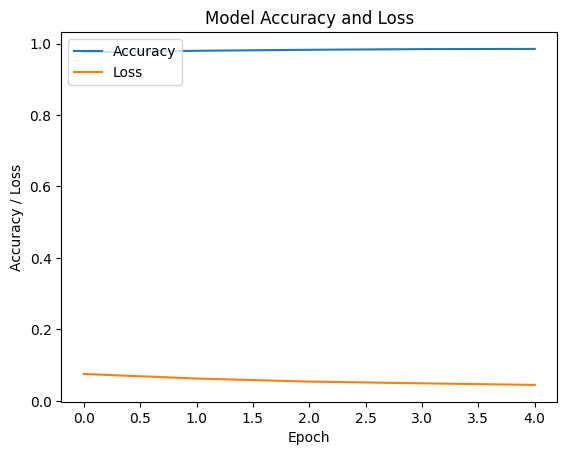

In [32]:
# Define a callback to store training history
history = NN.fit(X_train, y_train, epochs=5, verbose=1, callbacks=[keras.callbacks.History()])

# Plot training history (accuracy and loss)
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

In [14]:
 loss, accuracy = NN.evaluate(X_test, y_test, verbose=1)
print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(accuracy))

174/174 [==============================] - 1s 2ms/step - loss: 0.2328 - acc: 0.9210
Test Loss: 0.23284417390823364
Test Accuracy: 0.9209578633308411


174/174 [==============================] - 0s 2ms/step


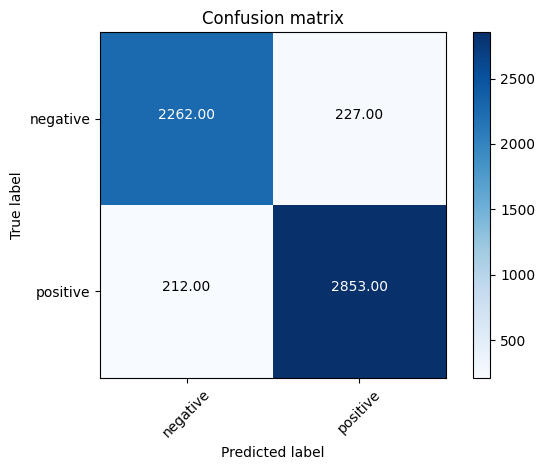

In [15]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming NN is your neural network model
predictions_prob = NN.predict(X_test)
predictions = (predictions_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, predictions, labels=[0,1])
title = 'Confusion matrix'
cmap = plt.cm.Blues
classes=["negative","positive"]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [16]:
report = classification_report(y_test, predictions, target_names=['0','1'])
print(report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2489
           1       0.93      0.93      0.93      3065

    accuracy                           0.92      5554
   macro avg       0.92      0.92      0.92      5554
weighted avg       0.92      0.92      0.92      5554



In [17]:
NN.layers[-1].activation='sigmoid'
NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [18]:
NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 128)           9843840   
                                                                 
 flatten (Flatten)           (None, 5120)              0         
                                                                 
 dense (Dense)               (None, 1)                 5121      
                                                                 
Total params: 9848961 (37.57 MB)
Trainable params: 9848961 (37.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
NN.layers[-1].activation = keras.activations.sigmoid

In [20]:
NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

16117/16117 [==============================] - 34s 2ms/step


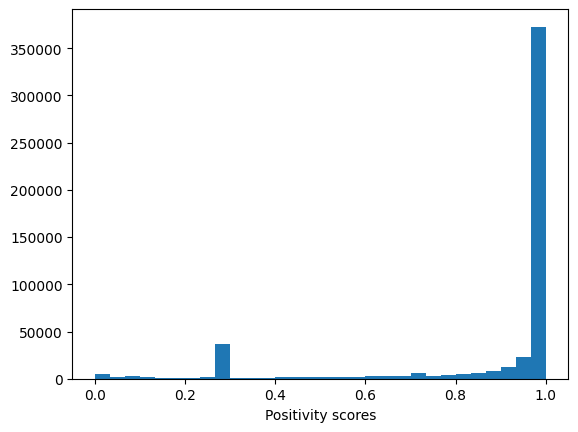

In [21]:
positive_reviews = [str(r) for r in reviews_df['Positive_Review'].values]

for idx, review in enumerate(positive_reviews):
    words = text_to_word_sequence(review)
    if len(words) > 40:
        words = words[:40]
        positive_reviews[idx] = ' '.join(words)

oneHotPositiveReviews = tokenizer.texts_to_sequences(positive_reviews)
encodedPositiveReviews = keras.preprocessing.sequence.pad_sequences(oneHotPositiveReviews, maxlen=40, padding='post')

positivity_predictions = NN.predict(encodedPositiveReviews)

plt.hist(positivity_predictions, bins=30)
plt.xlabel('Positivity scores')
plt.show()


In [22]:
import numpy as np

16117/16117 [==============================] - 34s 2ms/step


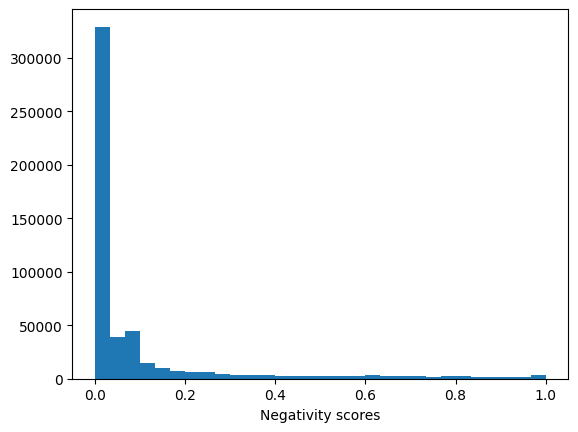

In [23]:
negative_reviews = [str(r) for r in reviews_df['Negative_Review'].values]

for idx, review in enumerate(negative_reviews):
    words = text_to_word_sequence(review)
    if len(words) > 40:
        words = words[:40]
        negative_reviews[idx] = ' '.join(words)

oneHotNegativeReviews = tokenizer.texts_to_sequences(negative_reviews)
encodedNegativeReviews = keras.preprocessing.sequence.pad_sequences(oneHotNegativeReviews, maxlen=40, padding='post')

negativity_predictions = NN.predict(encodedNegativeReviews)

plt.hist(negativity_predictions, bins=30)
plt.xlabel('Negativity scores')
plt.show()


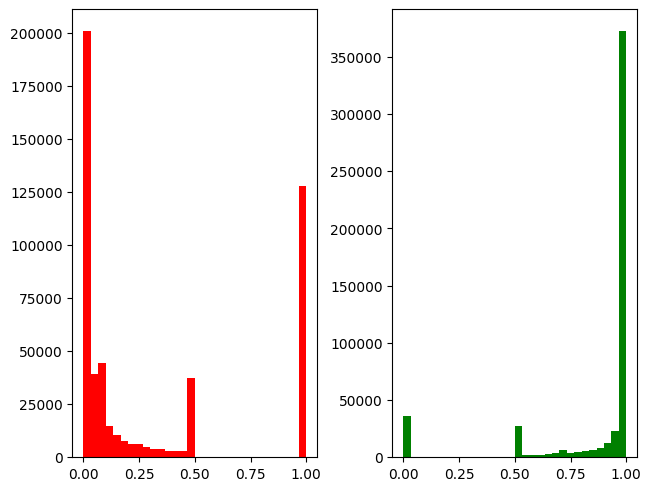

In [24]:
negative_reviews = reviews_df['Negative_Review'].values
positive_reviews = reviews_df['Positive_Review'].values

missing = ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative']

for idx, (text,score) in enumerate(zip(positive_reviews, positivity_predictions)):
    if text in missing : positivity_predictions[idx] = 0.0
    elif score < 0.5 : positivity_predictions[idx] = 0.501

for idx, (text,score) in enumerate(zip(negative_reviews, negativity_predictions)):
    if text in missing : negativity_predictions[idx] = 1.0
    elif score > 0.5 : negativity_predictions[idx] = 0.499

# Printing final distributions
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
axes[0].hist(negativity_predictions, color='red', bins=30)
axes[1].hist(positivity_predictions, color='green', bins=30)
plt.show()


In [25]:
reviews_df['Negative_Review_Score'] = negativity_predictions
reviews_df['Positive_Review_Score'] = positivity_predictions
reviews_df['Sentiment_Review_Score'] = (positivity_predictions+negativity_predictions)/2

positive_reviews = reviews_df['Positive_Review']
negative_reviews = reviews_df['Negative_Review']
sentiment_scores = reviews_df['Sentiment_Review_Score']
reviewer_score = reviews_df['Reviewer_Score']

print('Positive review: {}'.format(reviews_df['Positive_Review'][100]))
print('Negative review: {}'.format(reviews_df['Negative_Review'][100]))
print('Sentiment score: {}'.format(reviews_df['Sentiment_Review_Score'][100]))
print('Reviewer score: {}'.format(reviews_df['Reviewer_Score'][100]))

Positive review:  our room was amazing with a view of tower bridge we couldn t have asked for better 
Negative review: no negative
Sentiment score: 0.8008017539978027
Reviewer score: 10.0


In [26]:
target = []
final_scores = reviews_df['Sentiment_Review_Score'].values

for f in final_scores :
    if f >= 0.7 : target.append(4)
    elif f < 0.7 and f >= 0.5 : target.append(3)
    elif f < 0.5 and f >= 0.3 : target.append(2)
    else: target.append(1)

reviews_df['Sentiment_Review_Class'] = target

Number of best reviews:  157357
Number of good reviews:  216511
Number of bad reviews:   91176
Number of worst reviews: 50694


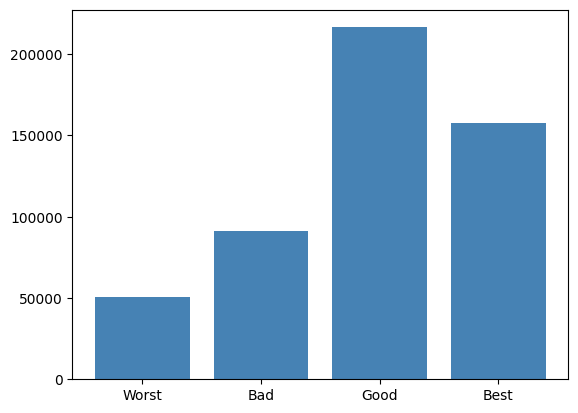

In [27]:
reviews_best = reviews_df[reviews_df['Sentiment_Review_Class'] == 4]['Positive_Review'].values
print('Number of best reviews:  {}'.format(len(reviews_best)))

reviews_good = reviews_df[reviews_df['Sentiment_Review_Class'] == 3]['Positive_Review'].values
print('Number of good reviews:  {}'.format(len(reviews_good)))

reviews_bad = reviews_df[reviews_df['Sentiment_Review_Class'] == 2]['Negative_Review'].values
print('Number of bad reviews:   {}'.format(len(reviews_bad)))

reviews_worst = reviews_df[reviews_df['Sentiment_Review_Class'] == 1]['Negative_Review'].values
print('Number of worst reviews: {}'.format(len(reviews_worst)))

fig, ax = plt.subplots()
x = ['Worst','Bad', 'Good', 'Best']
y = [len(reviews_worst),len(reviews_bad),len(reviews_good),len(reviews_best)]
vert_bars = ax.bar(x, y, color='steelblue', align='center')
plt.show()

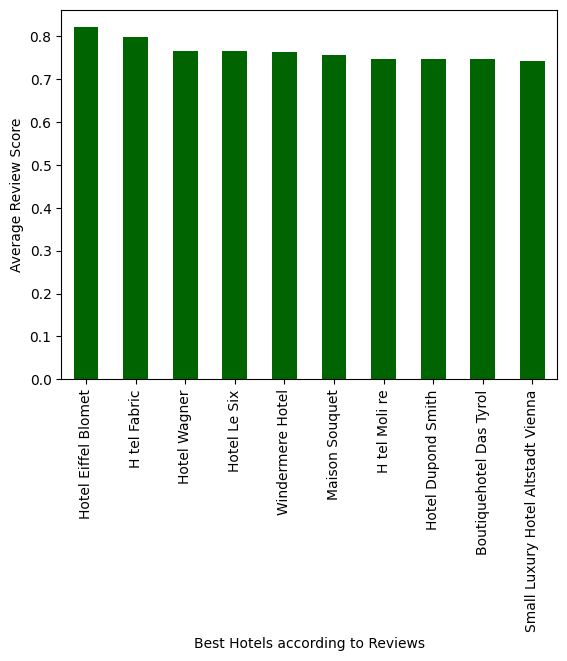

Hotel_Name
Hotel Eiffel Blomet                   0.820736
H tel Fabric                          0.798103
Hotel Wagner                          0.766373
Hotel Le Six                          0.765610
Windermere Hotel                      0.764120
Maison Souquet                        0.756084
H tel Moli re                         0.746431
Hotel Dupond Smith                    0.746152
Boutiquehotel Das Tyrol               0.745802
Small Luxury Hotel Altstadt Vienna    0.742988
Name: Sentiment_Review_Score, dtype: float32

In [28]:
#Printing best and worst hotels according to sentiment analysis__
worst_hotels = reviews_df.groupby('Hotel_Name')['Sentiment_Review_Score'].mean().sort_values(ascending=False).head(10)
worst_hotels.plot(kind="bar",color="DarkGreen")
_=plt.xlabel('Best Hotels according to Reviews')
_=plt.ylabel('Average Review Score')
plt.show()

reviews_df.groupby('Hotel_Name')['Sentiment_Review_Score'].mean().sort_values(ascending=False).head(10)

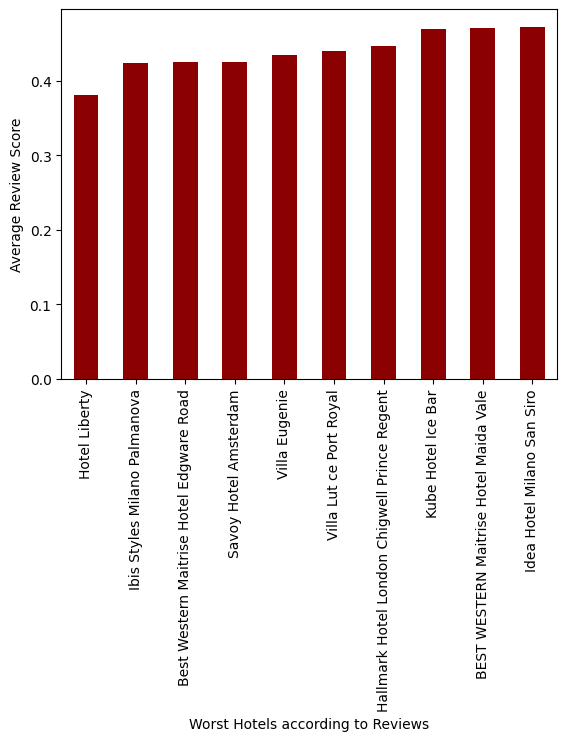

Hotel_Name
Hotel Liberty                                   0.381469
Ibis Styles Milano Palmanova                    0.424176
Best Western Maitrise Hotel Edgware Road        0.425304
Savoy Hotel Amsterdam                           0.425872
Villa Eugenie                                   0.434767
Villa Lut ce Port Royal                         0.439839
Hallmark Hotel London Chigwell Prince Regent    0.446765
Kube Hotel Ice Bar                              0.470253
BEST WESTERN Maitrise Hotel Maida Vale          0.471375
Idea Hotel Milano San Siro                      0.472749
Name: Sentiment_Review_Score, dtype: float32

In [29]:
worst_hotels = reviews_df.groupby('Hotel_Name')['Sentiment_Review_Score'].mean().sort_values(ascending=True).head(10)
worst_hotels.plot(kind="bar",color="DarkRed")
_=plt.xlabel('Worst Hotels according to Reviews')
_=plt.ylabel('Average Review Score')
plt.show()

reviews_df.groupby('Hotel_Name')['Sentiment_Review_Score'].mean().sort_values(ascending=True).head(10)

174/174 [==============================] - 0s 2ms/step


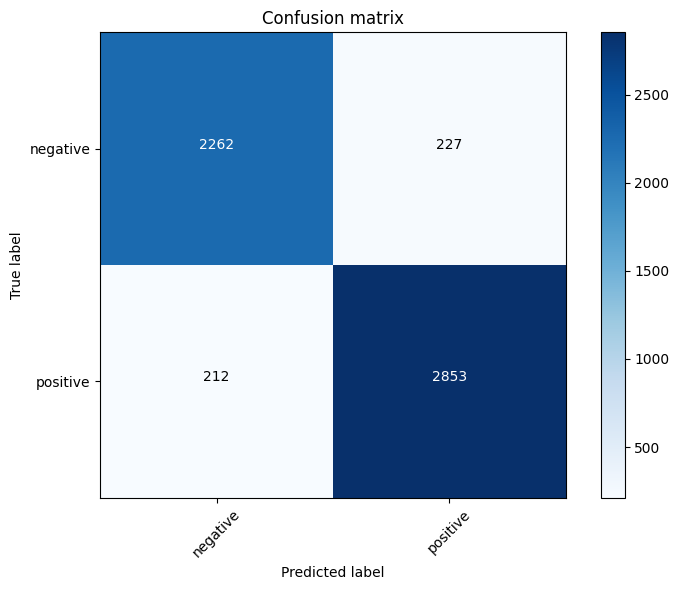

Matthews Correlation Coefficient: 0.8401189586189485


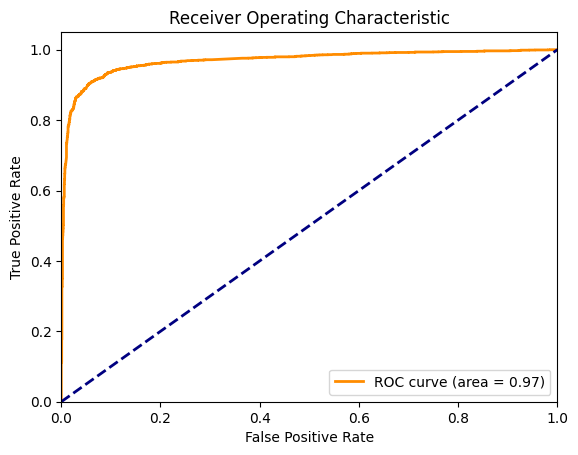

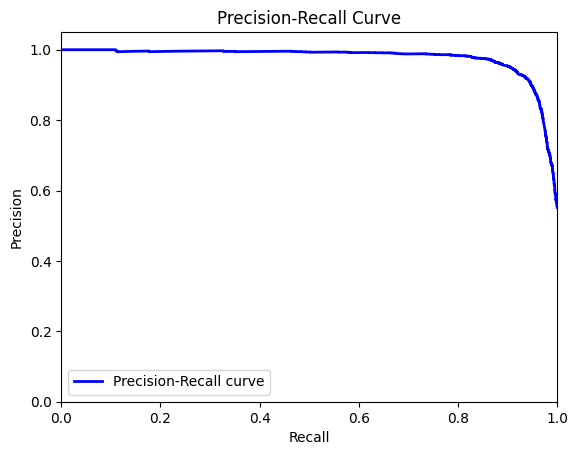

In [30]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, matthews_corrcoef, roc_curve, auc, precision_recall_curve

# Assuming NN is your neural network model
predictions_prob = NN.predict(X_test)
predictions = (predictions_prob > 0.5).astype(int)

# Calculate MCC
mcc = matthews_corrcoef(y_test, predictions)

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, predictions_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, predictions_prob)

# Plot Confusion Matrix
cm = confusion_matrix(y_test, predictions)
title = 'Confusion matrix'
cmap = plt.cm.Blues
classes=["negative","positive"]
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Display Matthews Correlation Coefficient
print("Matthews Correlation Coefficient:", mcc)

# Display ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Display Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


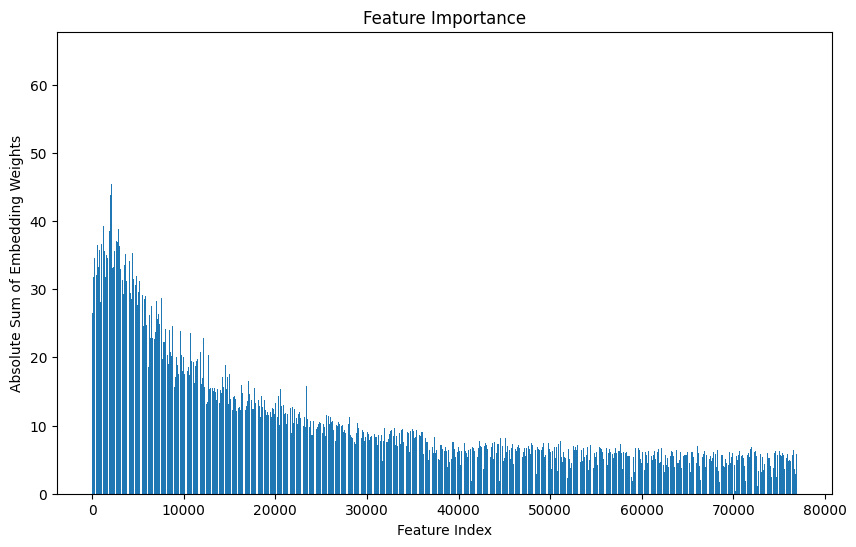

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming model1 and embedding_weights are defined
embedding_weights = NN.layers[0].get_weights()[0]

# Calculate the absolute sum of embedding weights for each feature
feature_importance = np.sum(np.abs(embedding_weights), axis=1)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Absolute Sum of Embedding Weights')
plt.title('Feature Importance')
plt.show()
